In [13]:
#Import necessary libraries

import math
import cv2
import numpy as np 
from time import time
import mediapipe as mp 
import matplotlib.pyplot as plt 

In [14]:
# Call mediapipe model and resources for landmarks
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence = 0.3, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

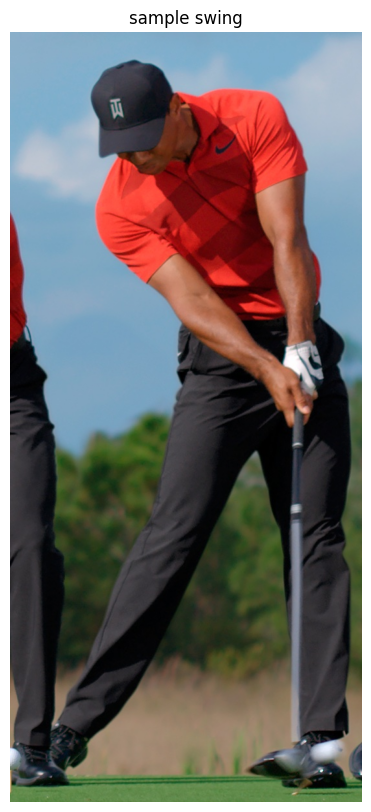

In [15]:
# Load in sample image of Tiger Woods
sample_img = cv2.imread('videos/sample_img.jpeg')

# Display Image before processing
plt.figure(figsize=[10,10])
plt.title("sample swing");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [16]:
''' Important Landmarks
2 = left eye
5 = right eye
11 = left_shoulder
12 = right_shoulder
13 = left_elbow
14 = right_elbow
'''

' Important Landmarks\n2 = left eye\n5 = right eye\n11 = left_shoulder\n12 = right_shoulder\n13 = left_elbow\n14 = right_elbow\n'

In [17]:
# Run sample image through pose detector
results = pose.process(cv2.cvtColor(sample_img,cv2.COLOR_BGR2RGB))

# Show results from first 2 landmarks ie the Nose and the Left Eye
if results.pose_landmarks:

    for i in range(2):

        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.4094742
y: 0.17661041
z: -0.6862496
visibility: 0.9492502

LEFT_EYE_INNER:
x: 0.40825984
y: 0.1580464
z: -0.7061543
visibility: 0.8622409



In [18]:
# Example of transforming results to scale with video/image dimensions

image_height, image_width, _ = sample_img.shape

if results.pose_landmarks:

    for i in range(2):

        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x:222.34448736906052
y:210.16638815402985
z:-372.6335402727127
visibility: 0.9492502212524414

LEFT_EYE_INNER:
x:221.68509247899055
y:188.0752095580101
z:-383.4417777657509
visibility: 0.8622409105300903



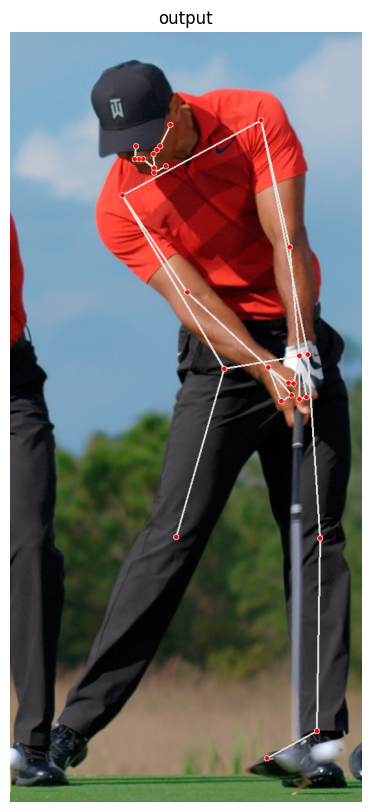

In [19]:
# Display sample image with landmarks

img_copy = sample_img.copy()

if results.pose_landmarks:

    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

    fig = plt.figure(figsize=[10,10])
    plt.title("output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

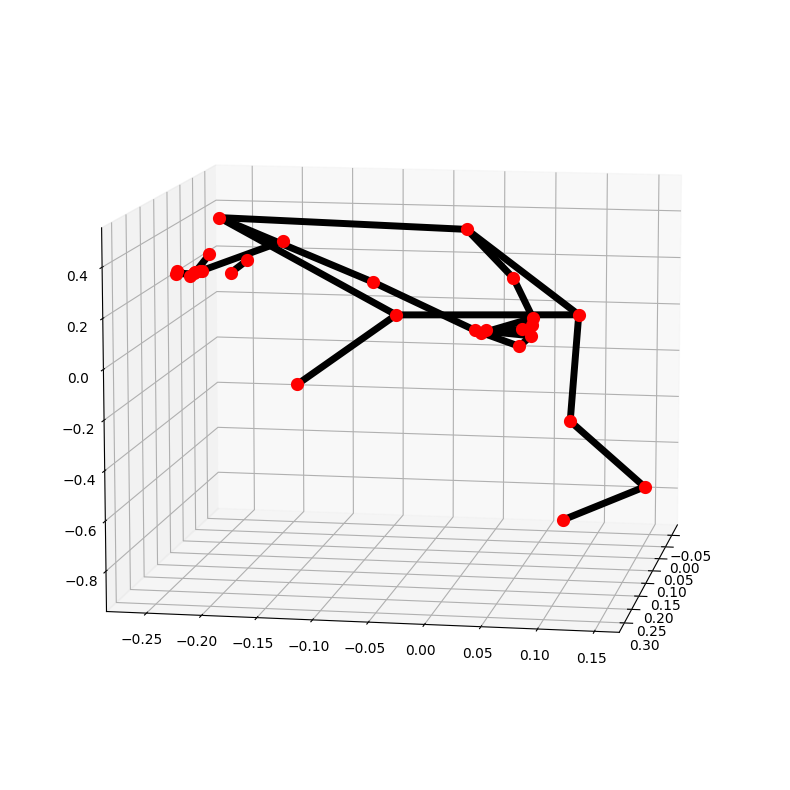

In [20]:
# Draw example on a 3D graph

mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

### Create def

In [21]:
# Functino to take image, and output new image with landmarks
def detectPose(image, pose, display=True):

    # Output image is a copy of the input image
    output_image = image.copy()
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Call 'pose' (mediapipe model) to draw landmarks
    results = pose.process(imageRGB)
    height, width, _ = image.shape

    landmarks = []

    # Draw and create list of landmarks
    if results.pose_landmarks:

        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                    connections=mp_pose.POSE_CONNECTIONS)
        
        for landmark in results.pose_landmarks.landmark:

            landmarks.append((int(landmark.x * width), int(landmark.y * height), int(landmark.z * width)))
    
    # Display output image if detectPose(display=TRUE)
    if display:

        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original");plt.axis("off")
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis("off")

        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    
    # If display=FALSE, just return landmarks and output image
    else:

        return output_image, landmarks

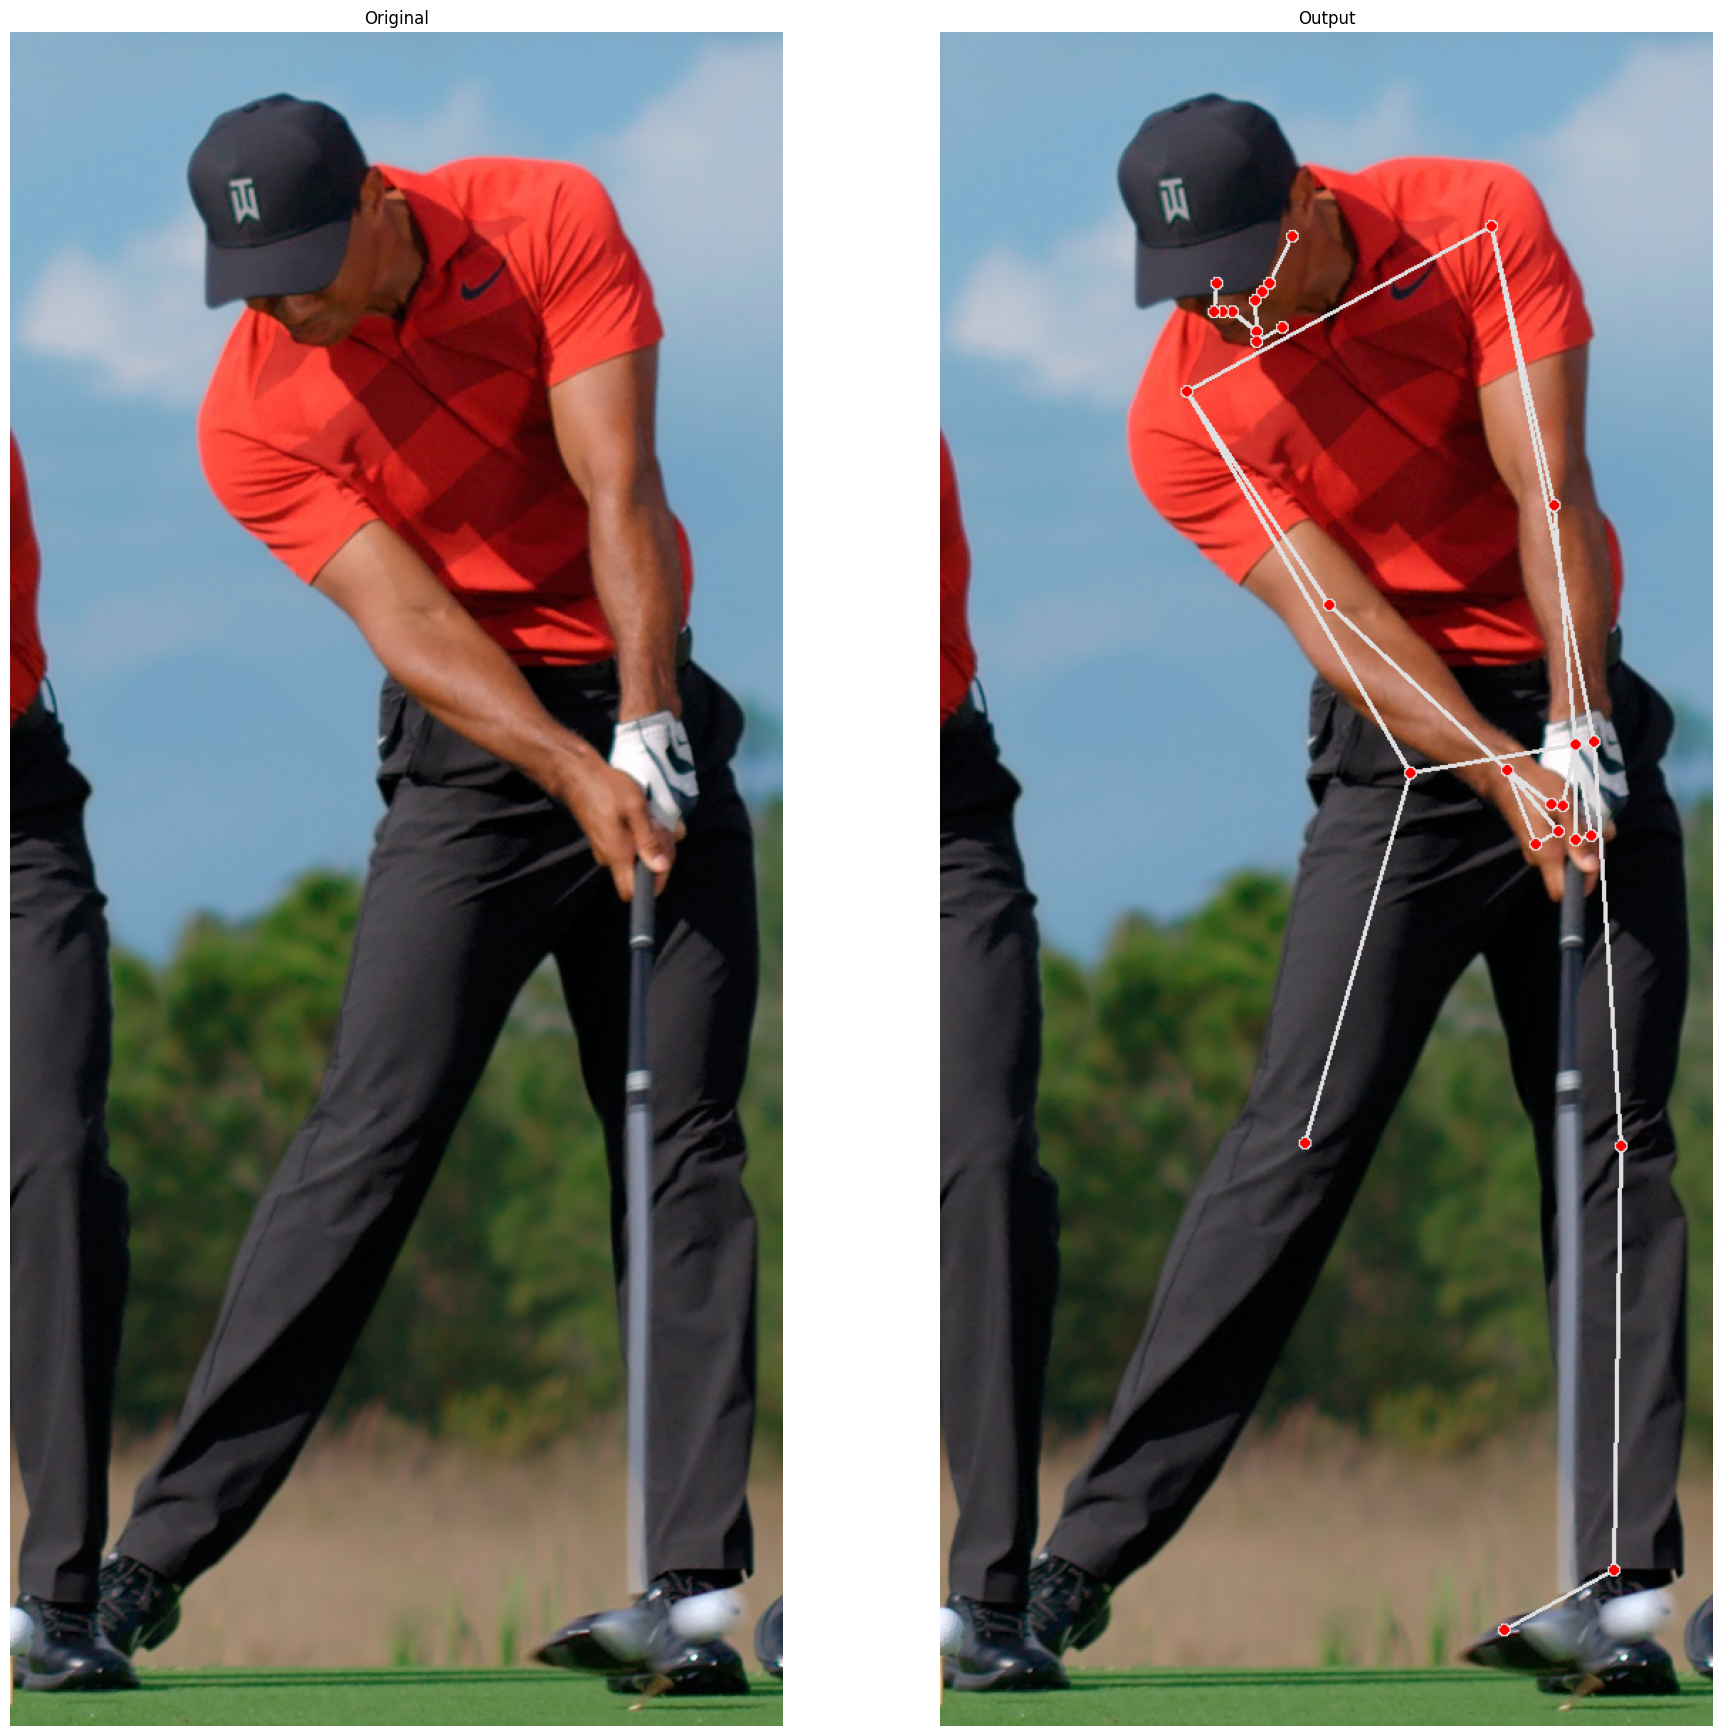

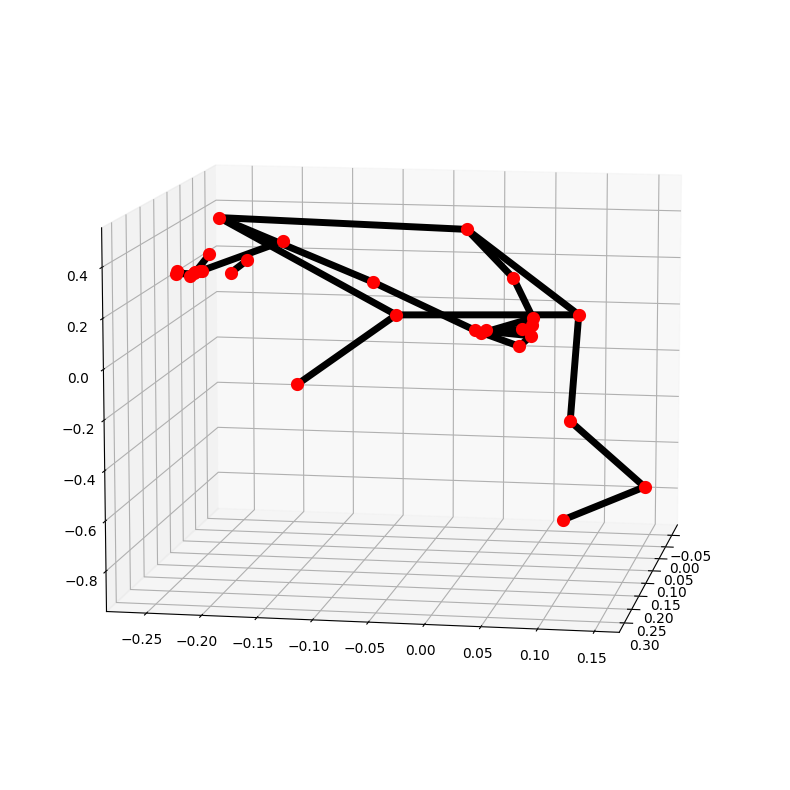

In [22]:
# Example with detectPose()
image = cv2.imread('videos/sample_img.jpeg')
detectPose(image,pose,display=True)

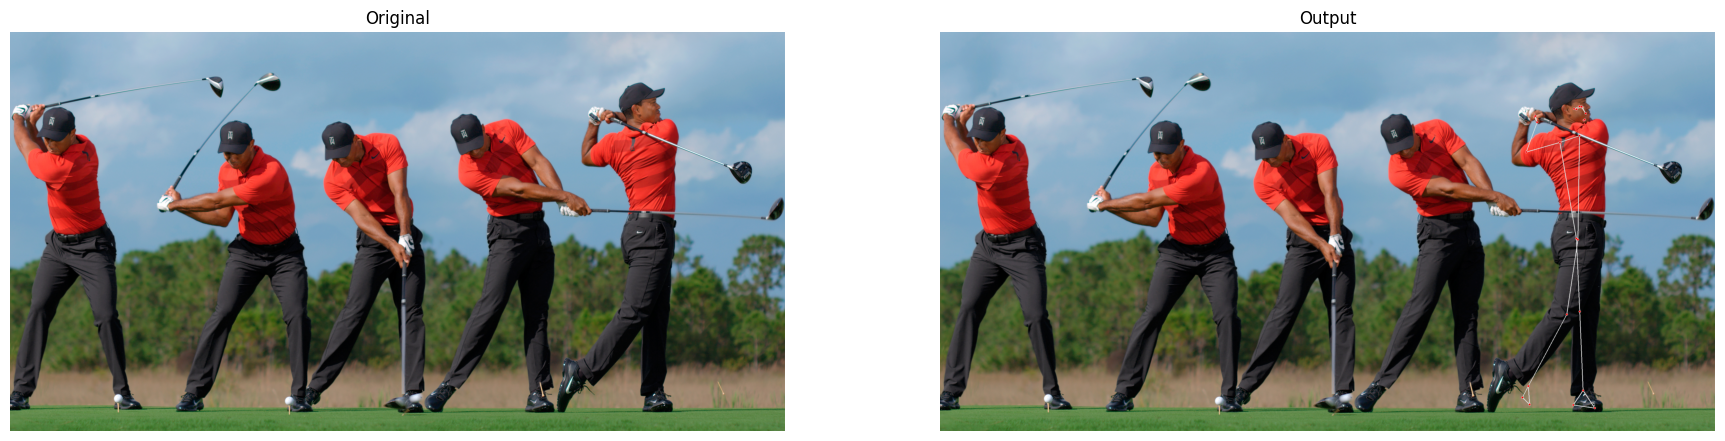

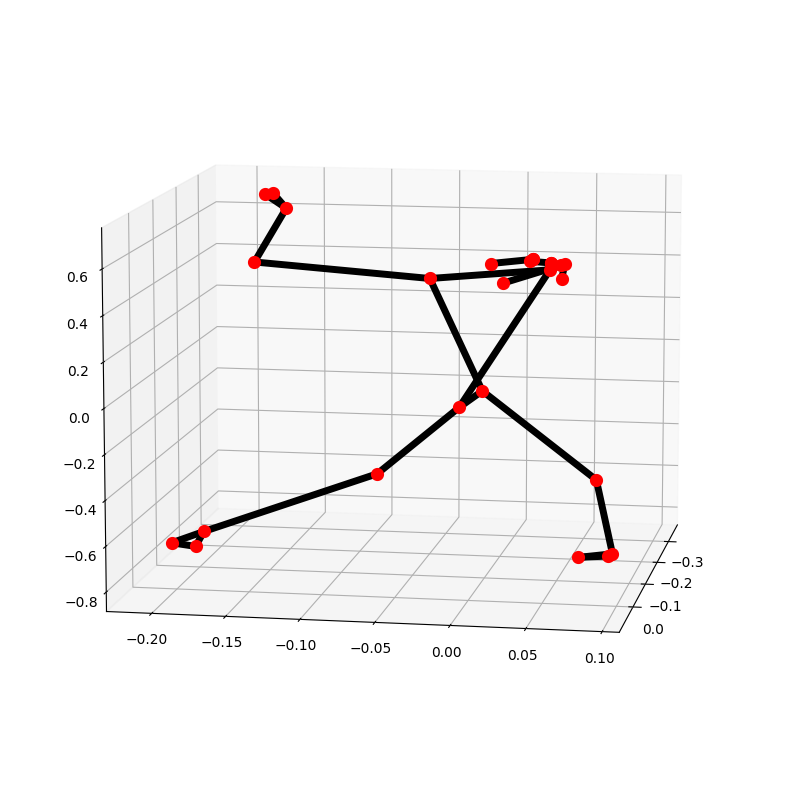

In [23]:
# Another example, however, notice how the pose detection recognizes only one figure. This may or may not be useful, but good to know for future reference
image = cv2.imread('videos/sample_img_full.jpeg')
detectPose(image,pose,display=True)

### Working with Video

The following code is to take a demo input of my swing (labeled as my_swing.mp4 under videos/) and mark landmarks on my body

In [24]:
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Open the input video
input_video = cv2.VideoCapture('videos/my_swing.mp4')

# Get video properties
fps = int(input_video.get(cv2.CAP_PROP_FPS))
width = int(input_video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(input_video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or use 'XVID' if mp4 doesn't work
out = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

time1 = 0

while input_video.isOpened():
    ok, frame = input_video.read()

    if not ok:
        print("End of video")
        break

    frame = cv2.flip(frame, 1)

    frame, _ = detectPose(frame, pose_video, display=False)

    time2 = time()

    if (time2 - time1) > 0:
        frames_per_second = 1.0/(time2 - time1)
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10,30), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 3)

    time1 = time2

    # Write the frame to the output video
    out.write(frame)

# Release everything when job is finished
input_video.release()
out.release()

End of video


The next block is playing the input live instead. At the current moment the windows don't close. Current use is for DEMO, won't be pushed into the final product.

In [ ]:
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# video = cv2.VideoCapture(1)

video = cv2.VideoCapture('videos/my_swing.mp4')

cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)

video.set(3,1280)
video.set(4,960)

time1 = 0

while video.isOpened():

    ok, frame = video.read()

    if not ok:
        print("End of Video")
        break

    frame = cv2.flip(frame, 1)

    frame_height, frame_width, _ = frame.shape

    frame = cv2.resize(frame, (int(frame_width * (640/frame_height)), 640))

    frame, _ = detectPose(frame, pose_video, display=False)

    time2 = time()

    if (time2 - time1) > 0:

        frames_per_second = 1.0/(time2 - time1)

        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10,30), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 3)

    time1 = time2

    cv2.imshow('Pose Detection', frame)

    k = cv2.waitKey(1) & 0xFF

    if (k == 27):
        break

video.release()
cv2.destroyAllWindows()

End of Video


: 